In [1]:
import healpy as hp
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.utils import hpid2_ra_dec, Site

from astropy.coordinates import EarthLocation,SkyCoord, get_sun
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import AltAz


In [2]:
nside=64
hpid = np.arange(hp.nside2npix(nside))

ra, dec = hpid2_ra_dec(nside,hpid)

site = Site("LSST")
observing_location = EarthLocation(lat=site.latitude, lon=site.longitude, height=site.height)

coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)


In [3]:
mjd_start = 60645 # Dec 1, 2024

In [4]:
mjds = np.arange(mjd_start, mjd_start+60, 15./60./24) # every 15 minutes

# toss out mjds where sun above -12 degree

times = Time(mjds, format='mjd')
suns = get_sun(times)

aa = AltAz(location=observing_location, obstime=times)

sun_alt = suns.transform_to(aa)

good = np.where(sun_alt.alt.deg < -12)

mjds = mjds[good]

In [5]:
mjds.shape

(1927,)

In [6]:
result = np.zeros(hp.nside2npix(nside))

alt_limit = 20


for mjd in mjds:
    observing_time = Time(mjd, format='mjd')  
    aa = AltAz(location=observing_location, obstime=observing_time)
    new_coord = coord.transform_to(aa)

    
    good = np.where(new_coord.alt.deg > alt_limit)
    
    
    # Also check where moon is and put a mask around it.
    
    result[good] += 15
    

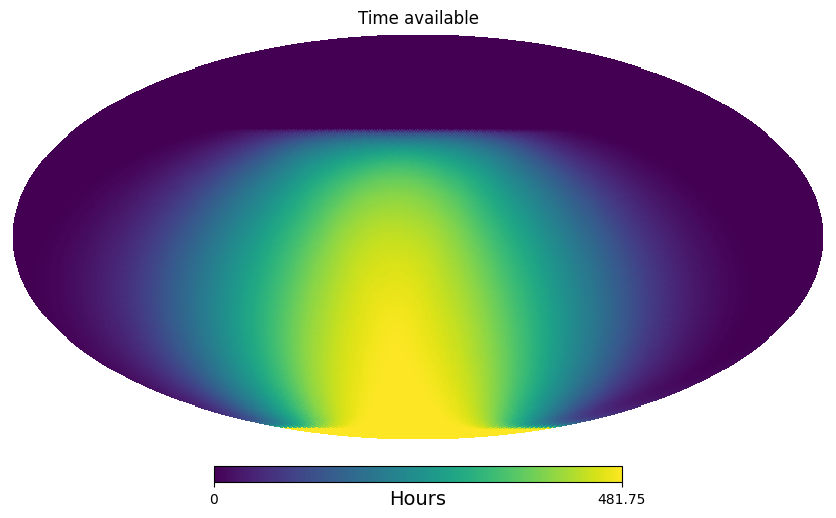

In [12]:
hp.mollview(result/60., title='Time available', unit='Hours', rot=(90,0,0))